## This notebook is used to test weighted tensor SVD
Input data weighting has been applied in weighted_tensor function following Jones et al., J. Chemometrics 22, 482, 2008

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tensor_svd_denoise import scree_plots, tensor_svd_denoise, weighted_tensor
import time

In [25]:
# Load noisy data and noiseless truth
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/'
data_noisy = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.mat')
data_noisy = data_noisy['datacube'].astype('float')
data_truth = np.load(path + 'Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')

# files in tensor_svd path
# data_noisy = np.load('Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.npy')
# data_truth = np.load('Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')
# print(np.where(data_noisy == 0))

# Optional: weight the noisy data
# If adapted the weighted data, reverse transform needs to be performed at the end.
data_noisy_weighted, weights = weighted_tensor(data_noisy,[], 0)

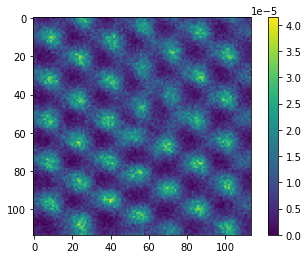

In [26]:
plt.imshow(data_noisy_weighted[:,:,10])
plt.colorbar()

In [27]:
# Call tensor SVD using pre-determined ranks and a timer
rank = [15,15,8]
# data_denoised = tensor_svd_denoise(data_noisy,rank)
data_denoised = tensor_svd_denoise(data_noisy, rank)
# Optional: transform back using the previously saved weights.
data_denoised_weighted = tensor_svd_denoise(data_noisy_weighted, rank)
data_denoised_weighted,_ = weighted_tensor(data_denoised_weighted, weights , 1)
print('SVD finished.')

SVD finished.


([], <a list of 0 Text major ticklabel objects>)

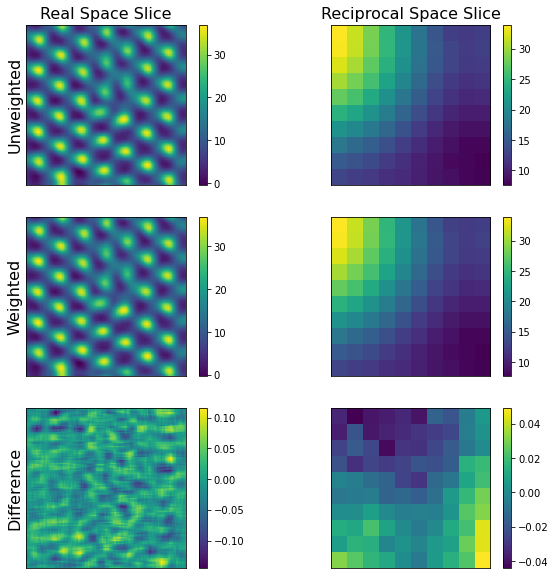

In [28]:
# Plot the denoised result next to ground truth
fig = plt.figure(figsize=(10,10))

plt.subplot(321)
plt.imshow(data_denoised[:,:,10])
plt.title('Real Space Slice',fontsize = 16)
plt.ylabel('Unweighted', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(322)
plt.imshow(data_denoised[10,10,:].reshape(10,10))
plt.title('Reciprocal Space Slice',fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(323)
plt.imshow(data_denoised_weighted[:,:,10])
plt.ylabel('Weighted', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(324)
plt.imshow(data_denoised_weighted[10,10,:].reshape(10,10))
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(325)
plt.imshow(data_denoised[:,:,10] - data_denoised_weighted[:,:,10])
plt.ylabel('Difference',fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(326)
plt.imshow(data_denoised[10,10,:].reshape(10,10) - data_denoised_weighted[10,10,:].reshape(10,10))
plt.colorbar()
plt.xticks([])
plt.yticks([])